<a href="https://colab.research.google.com/github/lanukahjo/Image-Splicing-Localisation/blob/main/Image_Splicing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Splicing Localisation
#### This notebook is the main flow of execution

In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
from skimage import io

import implice
import metrics

In [13]:
#This script runs a script to create random spliced images from a given set of 180 authentic images
#The authentic files are supposed to have names 1.bmp, 2.bmp etc
# %run generate_random_spliced_imageset.py 

Reading the file from the given location
manually for now.

In [14]:
# follow the link to get the dataset with the convention used in this code
# https://drive.google.com/drive/folders/1aSYYYfclL6AebD4o8NjlRdP26Y1BPFht?usp=sharing
IMG_NUM = 167 #locates the image from the dataset

#filepaths for diksham1
#PATH_TO_AUTHENTIC_IMG = '/content/AU_S_003.bmp'
#PATH_TO_SPLICED_IMG = '/content/SP_S_003.bmp';

#filepaths for lanukahjo
PATH_TO_AUTHENTIC_IMG = os.getcwd() + '/Dataset/Authentic/' + str(IMG_NUM) + '.bmp'
PATH_TO_SPLICED_IMG = os.getcwd() + '/Dataset/Spliced/' + str(IMG_NUM) + '_S.bmp'

In [15]:
#This function returns three matrices; each corresponding to the distance metric used
spliced_region_output = implice.localise_spliced_area(PATH_TO_AUTHENTIC_IMG,PATH_TO_SPLICED_IMG,THRESHOLD = 0.3)
output_img_euclidean_dist = spliced_region_output[0]
output_img_hellinger_dist = spliced_region_output[1]
output_img_minkowski_dist = spliced_region_output[2]

In [16]:
#The file contains the spliced region data for all images in a dataset
file = open(os.getcwd() + '/Dataset/spliced_area.csv','r')
csvreader = csv.reader(file)
rows = []
for row in csvreader:
    rows.append(row)
file.close();

In [17]:
#Metric Calculation
metrics_array_euclidean = metrics.getMetric(output_img_euclidean_dist,rows,IMG_NUM)
metrics_array_hellinger = metrics.getMetric(output_img_hellinger_dist,rows,IMG_NUM)
metrics_array_minkowski = metrics.getMetric(output_img_minkowski_dist,rows,IMG_NUM)

#The metrics for Euclidean Distance
true_positive = metrics_array_euclidean[0]
true_negative = metrics_array_euclidean[1]
false_positive = metrics_array_euclidean[2]
false_negative = metrics_array_euclidean[3]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall)/(precision + recall)
print("Euclidean Distance:-")
print(" Precision: " + str(precision))
print(" Recall: " + str(recall))
print(" f1_score: " + str(f1_score) + "\n")

#Metrics for Hellinger Distance
true_positive = metrics_array_hellinger[0]
true_negative = metrics_array_hellinger[1]
false_positive = metrics_array_hellinger[2]
false_negative = metrics_array_hellinger[3]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall)/(precision + recall)
print("Hellinger Distance:-")
print(" Precision: " + str(precision))
print(" Recall: " + str(recall))
print(" f1_score: " + str(f1_score) + "\n")

#Metrics for Minkowski Distance
true_positive = metrics_array_minkowski[0]
true_negative = metrics_array_minkowski[1]
false_positive = metrics_array_minkowski[2]
false_negative = metrics_array_minkowski[3]

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall)/(precision + recall)
print("Minkowski Distance")
print(" Precision: " + str(precision))
print(" Recall: " + str(recall))
print(" f1_score: " + str(f1_score))

Euclidean Distance:-
 Precision: 0.84375
 Recall: 1.0
 f1_score: 0.9152542372881356

Hellinger Distance:-
 Precision: 0.84375
 Recall: 1.0
 f1_score: 0.9152542372881356

Minkowski Distance
 Precision: 0.84375
 Recall: 1.0
 f1_score: 0.9152542372881356


In [18]:
#The marked area is painted in white for the purpose of displaying
output_img_euclidean_dist = implice.paint_in_white(output_img_euclidean_dist)
output_img_euclidean_dist = implice.paint_in_white(output_img_hellinger_dist)
output_img_euclidean_dist = implice.paint_in_white(output_img_minkowski_dist)

#The image is converted back to uint8 to make it a legal image format
output_img_euclidean_dist = np.uint8(output_img_euclidean_dist)
output_img_hellinger_dist = np.uint8(output_img_hellinger_dist)
output_img_minkowski_dist = np.uint8(output_img_minkowski_dist)

###Assumption
- Images are already in grayscale format (0-255)


In [19]:
# the text between the last '/' and the last '.' is the file name 
# assuming dataset's naming convention is followed
pos1 = PATH_TO_SPLICED_IMG.rindex("/")
pos2 = PATH_TO_SPLICED_IMG.rindex(".") 
base_file_name = PATH_TO_SPLICED_IMG[pos1:pos2]

#output filepath for diksham1
#io.imsave('euclidean.bmp', output_img_euclidean_dist)
#io.imsave('hellinger.bmp', output_img_hellinger_dist)
#io.imsave('minkowski.bmp', output_img_minkowski_dist)

#output filepath for lanukahjo
io.imsave(os.getcwd() + "/Output" + base_file_name + "_S_E.bmp", output_img_euclidean_dist)
io.imsave(os.getcwd() + "/Output" + base_file_name + "_S_H.bmp", output_img_hellinger_dist)
io.imsave(os.getcwd() + "/Output" + base_file_name + "_S_M.bmp", output_img_minkowski_dist)


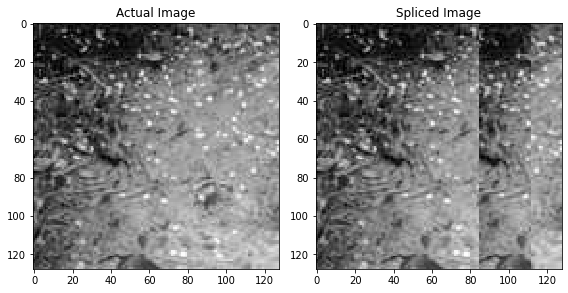

In [20]:
#Display the authentic and Spliced input images

img_auth = io.imread(PATH_TO_AUTHENTIC_IMG)
img_spl = io.imread(PATH_TO_SPLICED_IMG)

fig = plt.figure(figsize=(8,8));
ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text('Actual Image')
io.imshow(img_auth)
ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text('Spliced Image')
io.imshow(img_spl)


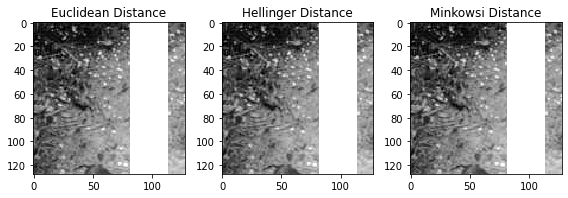

In [21]:
# Display the output images (spliced part colored)

#filepath for diksham1
#PATH_TO_EUCLIDEAN_DISTANCE = 'euclidean.bmp'
#PATH_TO_HELLINGER_DISTANCE = 'hellinger.bmp'
#PATH_TO_MINKOWSKI_DISTANCE = 'minkowski.bmp'

#filepath for lanukahjo
PATH_TO_EUCLIDEAN_DISTANCE = os.getcwd() + "/Output" + base_file_name + "_S_E.bmp"
PATH_TO_HELLINGER_DISTANCE = os.getcwd() + "/Output" + base_file_name + "_S_H.bmp"
PATH_TO_MINKOWSKI_DISTANCE = os.getcwd() + "/Output" + base_file_name + "_S_M.bmp"

img_euclidean = io.imread(PATH_TO_EUCLIDEAN_DISTANCE)
img_hellinger = io.imread(PATH_TO_HELLINGER_DISTANCE)
img_minkowski = io.imread(PATH_TO_MINKOWSKI_DISTANCE)

fig = plt.figure(figsize=(8,8));
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Euclidean Distance')
io.imshow(img_euclidean)
ax2 = fig.add_subplot(1,3,2)
ax2.title.set_text('Hellinger Distance')
io.imshow(img_hellinger)
ax2 = fig.add_subplot(1,3,3)
ax2.title.set_text('Minkowsi Distance')
io.imshow(img_minkowski)
